# Import necessary libraries

In [17]:
import sys
import os
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'src')))

# Import Custom Modules

In [18]:
from preprocessing import load_data, preprocess_data
from prediction import load_model, predict

# Heart disease model class

In [19]:
class HeartDiseaseModel:
    def __init__(self):
        self.model = RandomForestClassifier(
            n_estimators=100,
            max_depth=10,
            random_state=42
        )
        self.scaler = StandardScaler()
        self.label_encoders = {}

    def preprocess_data(self, df):
        """
        Preprocess the input data by handling categorical variables and scaling numerical features.
        """
        # Create a copy to avoid modifying the original dataframe
        df_processed = df.copy()
        
        # Categorical columns that need encoding
        categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina']
        
        # Numerical columns that need scaling
        numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
        
        # Encode categorical variables
        for col in categorical_cols:
            if col not in self.label_encoders:
                self.label_encoders[col] = LabelEncoder()
            df_processed[col] = self.label_encoders[col].fit_transform(df_processed[col])
        
        # Scale numerical variables
        df_processed[numerical_cols] = self.scaler.fit_transform(df_processed[numerical_cols])
        
        # Split data into features and target
        X = df_processed.drop('HeartDisease', axis=1)
        y = df_processed['HeartDisease']
        
        return X, y

    def train(self, X_train, y_train):
        self.model.fit(X_train, y_train)

    def save_model(self, model_path, scaler_path):
        joblib.dump(self.model, model_path)
        joblib.dump(self.scaler, scaler_path)

    def load_model(self, model_path, scaler_path):
        self.model, self.scaler = load_model(model_path, scaler_path)

    def predict(self, input_data):
        # Preprocess the input data
        input_data_processed = input_data.copy()
        categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina']
        numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
        
        for col in categorical_cols:
            input_data_processed[col] = self.label_encoders[col].transform(input_data_processed[col])
        
        input_data_processed[numerical_cols] = self.scaler.transform(input_data_processed[numerical_cols])
        
        return self.model.predict(input_data_processed)

# Load the dataset

In [20]:
data = load_data('../data/UCI_Heart_Disease_Dataset_Combined.csv')

# Create an instance of the HeartDiseaseModel

In [21]:

model = HeartDiseaseModel()

# Preprocess the data

In [22]:

X, y = model.preprocess_data(data)


# Split the Data into Training and Testing Sets

In [23]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Model

In [24]:

model.train(X_train, y_train)

# Save the model

In [25]:

model.save_model('../models/heart_disease_model.pkl', '../models/scaler.pkl')

# Evaluate the Model

In [26]:

y_pred = model.model.predict(X_test)
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

              precision    recall  f1-score   support

           0       0.92      0.75      0.83       263
           1       0.82      0.95      0.88       326

    accuracy                           0.86       589
   macro avg       0.87      0.85      0.86       589
weighted avg       0.87      0.86      0.86       589

Accuracy: 0.8607809847198642


# Predict on New Data

In [27]:

new_data = pd.DataFrame([{
    'Age': 63, 'Sex': 1, 'ChestPainType': 2, 'RestingBP': 145, 'Cholesterol': 233,
    'FastingBS': 1, 'RestingECG': 0, 'MaxHR': 150, 'ExerciseAngina': 0, 'Oldpeak': 2.3
}])
prediction = model.predict(new_data)
print(f"Prediction: {prediction}")

Prediction: [1]


# libraries for Visualization

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [29]:

df = pd.read_csv('../data/UCI_Heart_Disease_Dataset_Combined.csv')

# Define visualization function

In [30]:
def create_visualizations(df):
    """Create and save important visualizations for the dataset."""
    # Create visualizations directory if it doesn't exist
    if not os.path.exists('visualizations'):
        os.makedirs('visualizations')
   
    # 1. Age Distribution by Heart Disease
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x='Age', hue='HeartDisease', bins=30)
    plt.title('Age Distribution by Heart Disease Status')
    plt.savefig('visualizations/age_distribution.png')
    plt.show()
   
    # 2. Chest Pain Type Analysis
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='ChestPainType', hue='HeartDisease')
    plt.title('Chest Pain Type vs Heart Disease')
    plt.savefig('visualizations/chest_pain_analysis.png')
    plt.show()
   
    # 3. MaxHR vs Age with Heart Disease
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='Age', y='MaxHR', hue='HeartDisease')
    plt.title('Maximum Heart Rate vs Age')
    plt.savefig('visualizations/maxhr_vs_age.png')
    plt.show()
   
    # 4. Correlation Matrix
    plt.figure(figsize=(12, 8))
    numeric_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'HeartDisease']
    sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix of Numerical Features')
    plt.savefig('visualizations/correlation_matrix.png')
    plt.show()

# Create Visualizaton

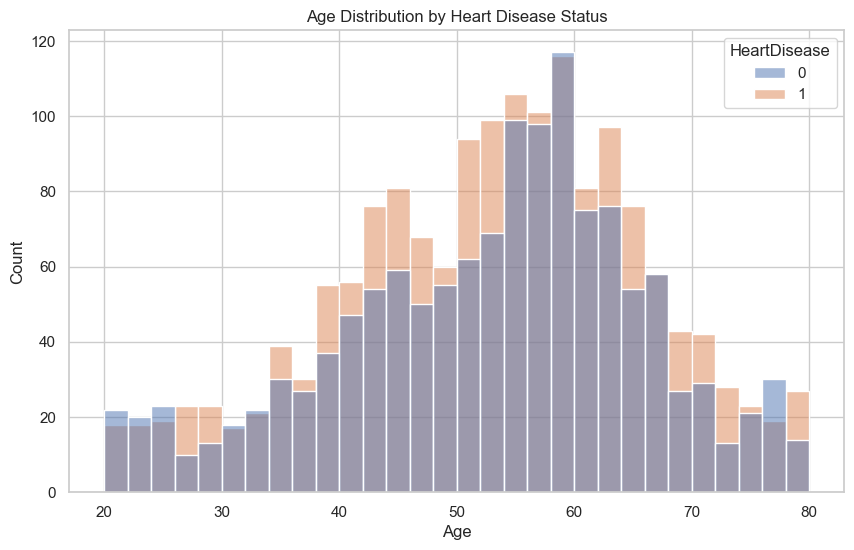

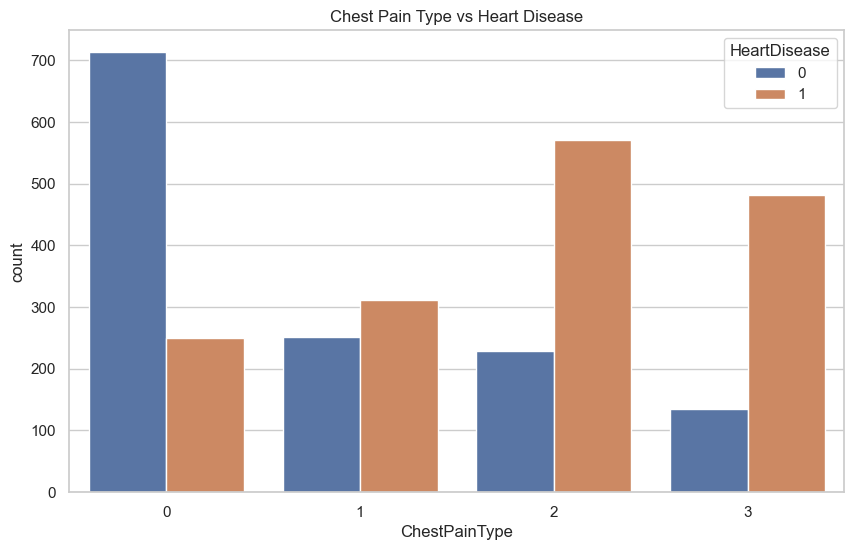

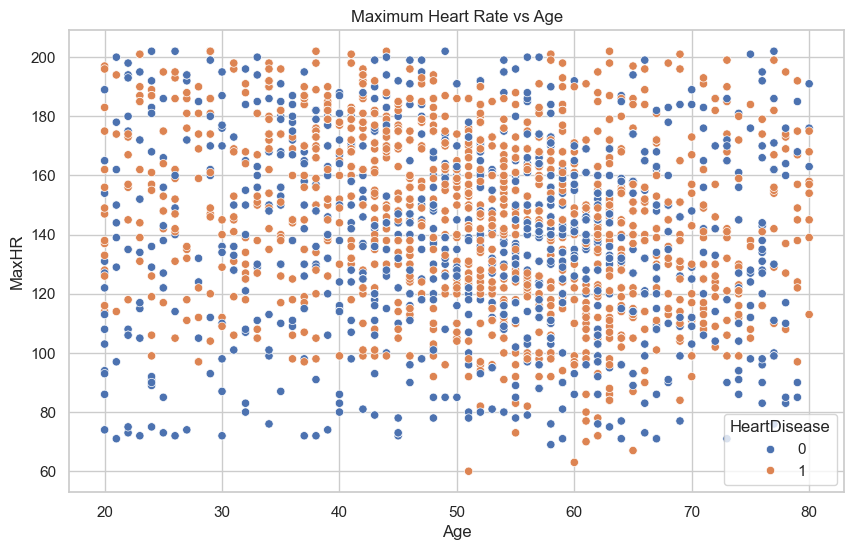

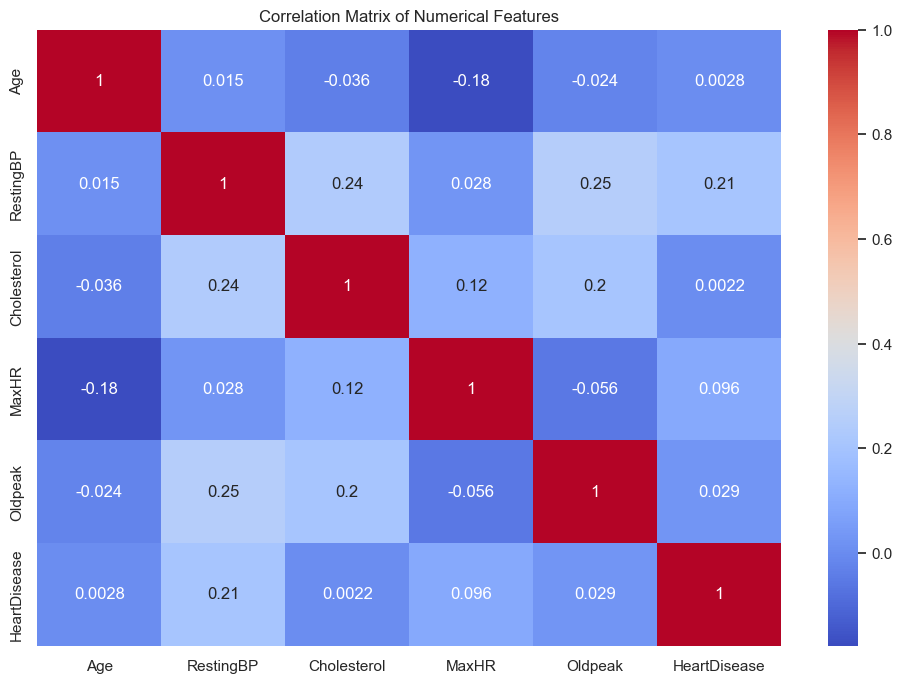

In [31]:
# Create visualizations
create_visualizations(df)